# Capstone #1

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt, timedelta
import matplotlib.pyplot as plt
import random as rd
import scipy.stats as stats
plt.style.use('ggplot')
#from IPython.core.display import HTML
#css = open('style-table.css') + open('style-notebook.css')
#HTML('<style>{}</style>')

# Data Input

In [202]:
in_folder = 'Kaggle/'
age_gender = pd.read_csv(in_folder + 'age_gender_bkts.csv')
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [203]:
countries = pd.read_csv(in_folder + 'countries.csv')
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [204]:
sessions = pd.read_csv(in_folder + 'sessions.csv')
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [205]:
test_users = pd.read_csv(in_folder + 'test_users.csv')
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [206]:
train_users = pd.read_csv(in_folder + 'train_users_2.csv',parse_dates=True)
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# Data Assessment and Cleaning

In [207]:
sessions.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [208]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [209]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [210]:
train_users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


<div class="span5 alert alert-success">
<p> Things of note:
    
- In train_users, we see that the date_first_booking column is composed of roughly 2/3 null entries, which corresponds with the users that never made a booking. 

- About half of the "age" entries are null, and there are some false entries as well (the minimum and maximum age is 1 and 2014, respectively).

- The timestamp_first_active column is integer type, which needs to be set to datetime format.</p>
</div>

In [211]:
# Create datetime columns when possible
train_users['timestamp_first_active'] = pd.to_datetime(train_users.timestamp_first_active.astype(str) ,format='%Y%m%d%H%M%S')
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'],format='%Y-%m-%d')
train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'],format='%Y-%m-%d')

In [212]:
# Assess the outliers in the age colume
train_users.age[(train_users.age >100) | (train_users.age < 10)].value_counts()

105.0     1131
2014.0     710
110.0      196
104.0       48
5.0         45
2013.0      39
102.0       34
109.0       31
103.0       26
107.0       23
101.0       23
106.0       17
108.0       15
115.0       13
2.0          7
113.0        4
1931.0       3
1932.0       3
4.0          3
1949.0       3
1929.0       2
1.0          2
111.0        2
1947.0       2
1936.0       2
1928.0       2
1924.0       2
112.0        1
1942.0       1
132.0        1
1927.0       1
1953.0       1
1938.0       1
150.0        1
1935.0       1
1952.0       1
1995.0       1
1925.0       1
1933.0       1
1926.0       1
2008.0       1
Name: age, dtype: int64

<div class="span5 alert alert-success">
<p> There are oddly high number of ages at 105, 2014, and 110. For now, let's set the ages above 100 or below 10 to NaN.</p>
</div>

In [213]:
# Set extreme age values to NaN
train_users.loc[train_users.age > 100,'age'] = np.NaN
train_users.loc[train_users.age < 10,'age'] = np.NaN

Text(0.5, 0, 'Age [years]')

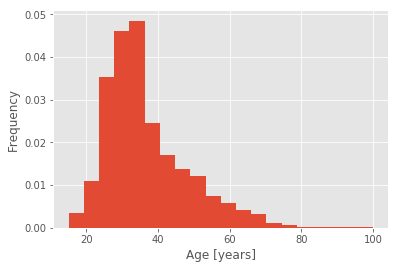

In [214]:
# Histogram of train_users.age. It is slightly skew right.
train_users.age.plot(kind='hist',bins=20,density=True)
plt.xlabel('Age [years]')

In [215]:
# Now the numbers look better.
train_users.age.describe()

count    123059.000000
mean         36.559211
std          11.690611
min          15.000000
25%          28.000000
50%          34.000000
75%          42.000000
max         100.000000
Name: age, dtype: float64

In [216]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


<div class="span5 alert alert-success">
<p> We can group by specific columns to get a gauge for their effect on "age" and "signup_flow."</p>
</div>

In [217]:
train_users.groupby('gender').describe()

age                                                       \
             count       mean        std   min   25%   50%   75%    max   
gender                                                                    
-unknown-  16124.0  36.939655  12.083221  15.0  29.0  34.0  43.0  100.0   
FEMALE     56741.0  36.236936  11.854297  15.0  28.0  33.0  42.0  100.0   
MALE       49969.0  36.800917  11.363991  15.0  29.0  34.0  42.0  100.0   
OTHER        225.0  36.888889  10.969565  17.0  29.0  35.0  44.0   78.0   

          signup_flow                                                 
                count      mean       std  min  25%  50%   75%   max  
gender                                                                
-unknown-     95688.0  4.183607  8.814782  0.0  0.0  0.0  0.00  25.0  
FEMALE        63041.0  2.359845  6.281494  0.0  0.0  0.0  0.00  25.0  
MALE          54440.0  2.712987  6.596060  0.0  0.0  0.0  0.00  25.0  
OTHER           282.0  2.283688  6.377592  0.0  0.0  0.0  0.75  25.0

In [218]:
train_users.groupby('signup_method').describe()

age                                                       \
                 count       mean        std   min   25%   50%   75%    max   
signup_method                                                                 
basic          65618.0  37.146393  12.010220  15.0  29.0  34.0  43.0  100.0   
facebook       57300.0  35.891012  11.276872  15.0  28.0  33.0  41.0  100.0   
google           141.0  34.843972  11.408821  18.0  27.0  32.0  39.0   99.0   

              signup_flow                                                     
                    count       mean       std   min   25%   50%   75%   max  
signup_method                                                                 
basic            152897.0   3.513136  8.176960   0.0   0.0   0.0   0.0  25.0  
facebook          60008.0   2.561775  5.982584   0.0   0.0   0.0   0.0  25.0  
google              546.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0

<div class="span5 alert alert-success">
<p> Between "basic" and "facebook" signup_methods, there is a 1.7 year age difference as well as a slight difference in mean signup_flow.</p>
</div>

In [219]:
train_users.groupby('language').describe()

age                                                         \
             count       mean        std   min    25%   50%    75%    max   
language                                                                    
ca             4.0  32.500000   6.137318  25.0  30.25  32.5  34.75   40.0   
cs            18.0  31.611111  13.284838  17.0  25.00  26.0  34.75   69.0   
da            33.0  33.151515   9.031615  18.0  26.00  33.0  40.00   51.0   
de           410.0  32.148780  10.344190  16.0  25.00  29.0  37.00   87.0   
el            22.0  34.227273   9.626015  21.0  29.25  33.5  36.50   66.0   
en        118590.0  36.708061  11.681182  15.0  28.00  34.0  42.00  100.0   
es           633.0  34.630332  12.225951  17.0  26.00  32.0  40.00   98.0   
fi            11.0  29.909091   5.957425  23.0  25.00  28.0  35.00   41.0   
fr           811.0  31.388409  11.486689  15.0  24.00  28.0  35.00   95.0   
hr             2.0  23.500000   7.778175  18.0  20.75  23.5  26.25   29.0   
hu            15.0  35.133333  12.665288  22.0  27.00  29.0  37.50   67.0   
id            17.0  28.117647   6.927142  19.0  22.00  30.0  32.00   39.0   
is             4.0  39.000000   6.733003  31.0  35.50  39.0  42.50   47.0   
it           361.0  33.157895  12.935739  16.0  25.00  30.0  39.00   96.0   
ja           128.0  35.976562  10.743586  18.0  27.00  34.5  43.00   66.0   
ko           397.0  33.785894  10.937933  17.0  26.00  31.0  39.00   96.0   
nl            53.0  35.075472  11.483850  18.0  26.00  31.0  42.00   66.0   
no            20.0  29.300000   7.934601  19.0  24.00  27.0  34.00   49.0   
pl            42.0  28.095238   9.598805  17.0  21.25  26.0  33.00   55.0   
pt           170.0  32.547059  10.153299  16.0  26.00  31.0  35.00   65.0   
ru           269.0  32.237918  10.875958  16.0  25.00  29.0  37.00   75.0   
sv            78.0  30.679487   9.064693  21.0  24.00  27.0  35.00   57.0   
th            18.0  36.333333  13.521225  16.0  28.00  33.0  45.25   67.0   
tr            45.0  32.533333  11.300845  20.0  26.00  29.0  33.00   75.0   
zh           908.0  31.675110  10.513139  17.0  25.00  28.0  36.00   95.0   

         signup_flow                                                  
               count      mean        std  min  25%  50%   75%   max  
language                                                              
ca               5.0  5.000000  11.180340  0.0  0.0  0.0  0.00  25.0  
cs              32.0  1.906250   5.508699  0.0  0.0  0.0  0.00  25.0  
da              58.0  5.086207   9.334495  0.0  0.0  0.0  2.75  25.0  
de             732.0  2.435792   6.480950  0.0  0.0  0.0  0.00  25.0  
el              24.0  4.208333   8.592105  0.0  0.0  0.0  0.75  25.0  
en          206314.0  3.271979   7.644901  0.0  0.0  0.0  0.00  25.0  
es             915.0  3.168306   7.441830  0.0  0.0  0.0  0.00  25.0  
fi              14.0  2.142857   6.643182  0.0  0.0  0.0  0.00  25.0  
fr            1172.0  2.174061   6.029142  0.0  0.0  0.0  0.00  25.0  
hr               2.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.0  
hu              18.0  0.111111   0.471405  0.0  0.0  0.0  0.00   2.0  
id              22.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.0  
is               5.0  0.000000   0.000000  0.0  0.0  0.0  0.00   0.0  
it             514.0  2.544747   6.430233  0.0  0.0  0.0  0.00  25.0  
ja             225.0  1.777778   5.910376  0.0  0.0  0.0  0.00  25.0  
ko             747.0  3.914324   8.250804  0.0  0.0  0.0  0.00  25.0  
nl              97.0  2.948454   6.960261  0.0  0.0  0.0  0.00  25.0  
no              30.0  5.800000   9.984125  0.0  0.0  0.0  9.75  25.0  
pl              54.0  1.018519   3.818973  0.0  0.0  0.0  0.00  25.0  
pt             240.0  2.991667   7.106477  0.0  0.0  0.0  0.00  25.0  
ru             389.0  3.097686   7.204360  0.0  0.0  0.0  0.00  25.0  
sv             122.0  4.049180   8.743217  0.0  0.0  0.0  0.00  25.0  
th              24.0  2.583333   7.324270  0.0  0.0  0.0  0.00  25.0  
tr          

Text(0, 0.5, 'Average Age')

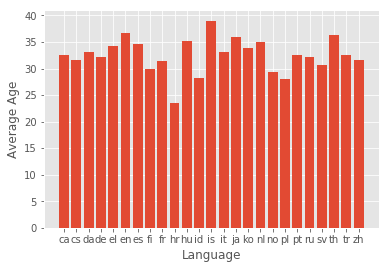

In [220]:
plt.bar(train_users.groupby('language').describe().index,train_users.groupby('language').describe()[('age','mean')])
plt.xlabel('Language')
plt.ylabel('Average Age')

Text(0, 0.5, 'Signup_flow')

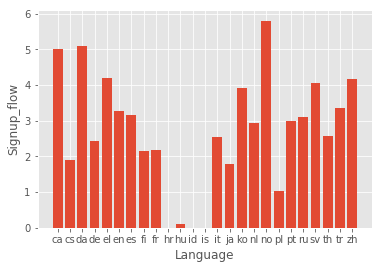

In [221]:
plt.bar(train_users.groupby('language').describe().index,train_users.groupby('language').describe()[('signup_flow','mean')])
plt.xlabel('Language')
plt.ylabel('Signup_flow')

In [222]:
train_users.groupby('first_browser').describe()

age                                                  \
                        count       mean        std   min    25%   50%    75%   
first_browser                                                                   
-unknown-             12007.0  34.195553  10.152760  15.0  27.00  32.0  38.00   
AOL Explorer             98.0  58.969388  12.259609  19.0  52.25  59.5  66.75   
Android Browser         399.0  35.854637  10.380157  18.0  28.00  34.0  41.00   
Apple Mail               23.0  39.304348  13.081683  18.0  30.50  36.0  43.00   
Arora                     0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Avant Browser             4.0  48.250000  13.573872  30.0  42.00  51.5  57.75   
BlackBerry Browser       34.0  36.470588  10.843893  21.0  29.00  34.5  42.50   
Camino                    6.0  43.333333   9.201449  33.0  37.00  41.0  51.00   
Chrome                41301.0  34.270696  10.560307  15.0  27.00  32.0  38.00   
Chrome Mobile           596.0  33.906040   9.769679  18.0  27.00  32.0  38.00   
Chromium                 53.0  34.283019  13.369566  20.0  26.00  31.0  37.00   
CometBird                 1.0  48.000000        NaN  48.0  48.00  48.0  48.00   
Comodo Dragon             1.0  42.000000        NaN  42.0  42.00  42.0  42.00   
Conkeror                  0.0        NaN        NaN   NaN    NaN   NaN    NaN   
CoolNovo                  4.0  25.750000   4.031129  21.0  23.25  26.0  28.50   
Crazy Browser             0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Epic                      0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Firefox               20327.0  38.181434  11.878089  15.0  30.00  35.0  44.00   
Flock                     0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Google Earth              0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Googlebot                 0.0        NaN        NaN   NaN    NaN   NaN    NaN   
IE                    10330.0  41.775799  13.345563  15.0  31.00  39.0  51.00   
IE Mobile                13.0  36.846154  13.777071  22.0  29.00  31.0  39.00   
IceDragon                 0.0        NaN        NaN   NaN    NaN   NaN    NaN   
IceWeasel                10.0  33.400000  10.915840  19.0  27.00  32.5  35.75   
Iron                     12.0  33.750000   8.915003  23.0  28.50  33.0  35.25   
Kindle Browser            1.0  35.000000        NaN  35.0  35.00  35.0  35.00   
Maxthon                  28.0  34.285714  10.259078  23.0  25.75  30.5  39.25   
Mobile Firefox           18.0  42.944444  13.553694  27.0  33.00  38.5  54.50   
Mobile Safari         10214.0  38.039064  12.018872  16.0  29.00  35.0  45.00   
Mozilla                   2.0  31.500000   3.535534  29.0  30.25  31.5  32.75   
NetNewsWire               1.0  44.000000        NaN  44.0  44.00  44.0  44.00   
OmniWeb                   0.0        NaN        NaN   NaN    NaN   NaN    NaN   
Opera                   111.0  35.891892  14.029418  17.0  27.00  31.0  42.00   
Opera Mini                2.0  33.000000   8.485281  27.0  30.00  33.0  36.00   
Opera Mobile              2.0  30.500000   2.121320  29.0  29.75  30.5  31.25   
Outlook 2007              0.0        NaN        NaN   NaN    NaN   NaN    NaN   
PS Vita browser           1.0  32.000000        NaN  32.0  32.00  32.0  32.00   
Pale Moon                 7.0  39.285714  15.702593  21.0  27.50  40.0  48.00   
Palm Pre web browser      0.0        NaN        NaN   NaN    NaN   NaN    NaN   
RockMelt                 21.0  35.952381  11.079152  23.0  28.00  33.0  40.00   
Safari                27313.0  37.320909  11.939070  15.0  29.00  34.0  44.00   
SeaMonkey                 3.0  27.333333   8.326664  18.0  24.00  30.0  32.00   
Silk                     70.0  38.142857  11.665986  18.0  31.00  36.0  45.00   
SiteKiosk                11.0  40.545455  16.524912  25.0  26.50  32.0  55.00   
SlimBrowser               2.0  33.000000  21.213203  18.0  25.50  33.0  40.50   
Sogou Explorer           13.0  26.769231   4.603510  18.0

In [223]:
train_users.groupby('first_device_type').describe()

age                                                 \
                      count       mean        std   min    25%   50%   75%   
first_device_type                                                            
Android Phone        1246.0  34.267255   9.872114  18.0  28.00  32.0  39.0   
Android Tablet        635.0  39.214173  12.476658  18.0  30.00  36.0  46.0   
Desktop (Other)       742.0  34.811321  10.705957  18.0  27.25  32.0  38.0   
Mac Desktop         57173.0  35.992199  11.221909  15.0  28.00  33.0  41.0   
Other/Unknown        3951.0  36.066059  11.179092  16.0  28.00  33.0  41.0   
SmartPhone (Other)     39.0  36.051282  10.862656  21.0  29.00  33.0  40.0   
Windows Desktop     41286.0  37.699801  12.498651  15.0  29.00  34.0  44.0   
iPad                 7542.0  39.935693  12.499303  16.0  31.00  37.0  47.0   
iPhone              10445.0  33.141024   9.250168  15.0  27.00  31.0  37.0   

                          signup_flow                                         \
                      max       count       mean        std  min   25%   50%   
first_device_type                                                              
Android Phone        93.0      2803.0  14.197289  10.153038  0.0   0.0  23.0   
Android Tablet       81.0      1292.0   3.296440   7.582210  0.0   0.0   0.0   
Desktop (Other)      95.0      1199.0   1.121768   4.396104  0.0   0.0   0.0   
Mac Desktop         100.0     89600.0   0.860837   3.640467  0.0   0.0   0.0   
Other/Unknown        99.0     10667.0  10.782694   9.543943  0.0   2.0  12.0   
SmartPhone (Other)   68.0        76.0   5.526316   9.119172  0.0   0.0   0.0   
Windows Desktop     100.0     72716.0   0.720612   3.303540  0.0   0.0   0.0   
iPad                100.0     14339.0   2.218425   6.520384  0.0   0.0   0.0   
iPhone              100.0     20759.0  18.076401   9.802862  0.0  12.0  25.0   

                                
                     75%   max  
first_device_type               
Android Phone       23.0  25.0  
Android Tablet       0.0  25.0  
Desktop (Other)      0.0  25.0  
Mac Desktop          0.0  25.0  
Other/Unknown       23.0  25.0  
SmartPhone (Other)  12.0  25.0  
Windows Desktop      0.0  25.0  
iPad                 0.0  25.0  
iPhone              25.0  25.0

Text(0, 0.5, 'Signup_flow')

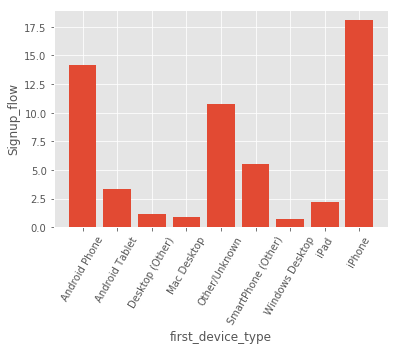

In [224]:
plt.bar(train_users.groupby('first_device_type').describe().index,train_users.groupby('first_device_type').describe()[('signup_flow','mean')])
plt.xlabel('first_device_type')
plt.xticks(rotation=60)
plt.ylabel('Signup_flow')

In [225]:
train_users.groupby('signup_app').describe()

age                                                       \
               count       mean        std   min   25%   50%   75%    max   
signup_app                                                                  
Android       2289.0  33.702490   9.787033  16.0  27.0  31.0  38.0   99.0   
Moweb         2323.0  33.325872   9.345284  18.0  27.0  31.0  37.0   95.0   
Web         108619.0  37.010173  11.884699  15.0  29.0  34.0  43.0  100.0   
iOS           9828.0  33.004782   9.383938  15.0  27.0  31.0  37.0  100.0   

           signup_flow                                                    
                 count       mean       std  min   25%   50%   75%   max  
signup_app                                                                
Android         5454.0  17.750275  5.512600  0.0  12.0  23.0  23.0  24.0  
Moweb           6261.0  18.368312  7.839633  0.0  12.0  24.0  24.0  24.0  
Web           182717.0   0.379543  1.754670  0.0   0.0   0.0   0.0  25.0  
iOS            19019.0  21.886745  5.843743  0.0  25.0  25.0  25.0  25.0

In [226]:
train_users.groupby('affiliate_provider').describe()

age                                                  \
                       count       mean        std   min    25%   50%    75%   
affiliate_provider                                                             
baidu                   15.0  27.600000   6.138869  23.0  24.00  26.0  29.00   
bing                  1182.0  44.731810  14.462541  18.0  32.25  44.0  55.00   
craigslist            2200.0  37.484545  10.232350  18.0  30.00  35.0  43.00   
daum                     0.0        NaN        NaN   NaN    NaN   NaN    NaN   
direct               78884.0  35.803712  11.047099  15.0  28.00  33.0  41.00   
email-marketing         79.0  38.189873  12.970456  18.0  30.00  35.0  44.50   
facebook              1600.0  35.553125  12.728745  18.0  26.00  32.0  42.00   
facebook-open-graph    403.0  39.362283  12.635840  19.0  30.00  37.0  47.00   
google               29108.0  38.806789  13.086703  15.0  29.00  36.0  47.00   
gsp                    184.0  43.184783  13.284141  16.0  33.00  42.0  51.00   
meetup                 136.0  31.970588   6.736238  19.0  27.00  31.0  35.00   
naver                   26.0  33.538462  11.207964  21.0  26.00  29.5  37.25   
other                 8141.0  34.238177  10.106382  16.0  27.00  32.0  38.00   
padmapper              455.0  30.068132   8.002600  18.0  25.00  28.0  32.00   
vast                   382.0  42.445026  12.964149  18.0  32.00  41.0  50.00   
wayn                     2.0  41.500000   9.192388  35.0  38.25  41.5  44.75   
yahoo                  248.0  44.991935  12.887866  21.0  34.00  45.0  54.00   
yandex                  14.0  32.785714   8.468753  19.0  27.00  33.0  34.75   

                           signup_flow                                       \
                       max       count      mean        std  min  25%   50%   
affiliate_provider                                                            
baidu                 46.0        29.0  0.000000   0.000000  0.0  0.0   0.0   
bing                 100.0      2328.0  0.470361   2.562158  0.0  0.0   0.0   
craigslist            95.0      3471.0  1.392682   1.314053  0.0  0.0   2.0   
daum                   NaN         1.0  0.000000        NaN  0.0  0.0   0.0   
direct               100.0    137426.0  4.139748   8.911943  0.0  0.0   0.0   
email-marketing       97.0       166.0  5.222892  10.138661  0.0  0.0   0.0   
facebook              98.0      2273.0  0.544215   3.139355  0.0  0.0   0.0   
facebook-open-graph   96.0       545.0  0.099083   1.295247  0.0  0.0   0.0   
google               100.0     51693.0  0.285996   1.450756  0.0  0.0   0.0   
gsp                   95.0       453.0  0.000000   0.000000  0.0  0.0   0.0   
meetup                65.0       347.0  4.086455   9.041875  0.0  0.0   0.0   
naver                 59.0        52.0  1.384615   5.650451  0.0  0.0   0.0   
other                100.0     12549.0  8.213882   5.498992  0.0  0.0  12.0   
padmapper             94.0       768.0  0.242188   2.365813  0.0  0.0   0.0   
vast                  90.0       829.0  0.984318   2.361833  0.0  0.0   0.0   
wayn                  48.0         8.0  0.000000   0.000000  0.0  0.0   0.0   
yahoo                 91.0       496.0  0.108871   1.533545  0.0  0.0   0.0   
yandex                55.0        17.0  1.470588   6.063391  0.0  0.0   0.0   

                                 
                      75%   max  
affiliate_provider               
baidu                 0.0   0.0  
bing                  0.0  25.0  
craigslist            3.0  16.0  
daum                  0.0   0.0  
direct                0.0  25.0  
email-marketing       0.0  25.0  
facebook              0.0  25.0  
facebook-open-graph   0.0  21.0  
google                0.0  25.0  
gsp                   0.0   0.0  
meetup                0.0  25.0  
naver                 0.0  24.0  
other                12.0  25.0  
padmapper             0.0  24.0  
vast                  2.0  24.0  
wayn                  0.0   0.0  
yahoo                 0.0  24.0  
yand

Text(0, 0.5, 'Count')

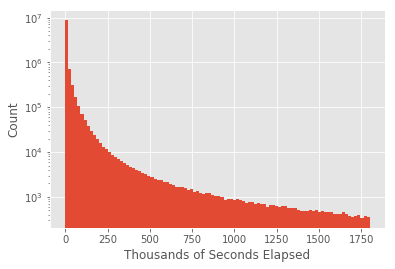

In [227]:
# Histogram of sessions.secs_elapsed.
(sessions.secs_elapsed/1000).hist(bins=100)
plt.yscale('log')
plt.xlabel('Thousands of Seconds Elapsed')
plt.ylabel('Count')

In [228]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [229]:
sessions.groupby(['action_type']).describe()

secs_elapsed                                               \
                        count           mean            std  min       25%   
action_type                                                                  
-unknown-           1019495.0   28790.921498  114380.085795  0.0    299.00   
booking_request       18649.0   49733.959194  136462.653495  0.0   1000.00   
booking_response          4.0   35626.500000   29090.326462  0.0  25791.75   
click               1995554.0   21431.909105   87729.259741  0.0    772.00   
data                2103205.0    7207.314674   36791.242458  0.0    129.00   
message_post          71650.0  117459.657195  216518.575382  0.0   7000.00   
modify                 1139.0   36444.363477   72028.067220  4.0   7077.50   
partner_callback      10103.0   28656.822429   70712.078131  0.0   7795.50   
submit               531758.0   40467.226650  119549.901590  0.0   1128.00   
view                3557139.0   20534.717217   94554.456825  0.0    297.00   

                                                 
                      50%        75%        max  
action_type                                      
-unknown-          1318.0   13658.00  1799847.0  
booking_request    6266.0   29261.00  1791659.0  
booking_response  35647.0   45481.75    71212.0  
click              2965.0   13935.00  1799730.0  
data                717.0    2271.00  1797169.0  
message_post      40779.0  128014.00  1799949.0  
modify            15131.0   33254.50   862704.0  
partner_callback  13670.0   25984.00  1720001.0  
submit             7283.0   29474.75  1798766.0  
view               1250.0    9492.00  1799977.0

In [230]:
sessions.groupby('device_type').describe()

secs_elapsed                               \
                                        count          mean            std   
device_type                                                                  
-unknown-                            207003.0  25603.201379   98496.750963   
Android App Unknown Phone/Tablet     271226.0  13342.514479   68485.141009   
Android Phone                        831491.0  12435.433043   70341.062782   
Blackberry                              946.0  53828.986258  190946.762703   
Chromebook                            21971.0  23592.867280   97464.527684   
Linux Desktop                         27956.0  25245.841644  108668.061160   
Mac Desktop                         3549842.0  19916.708755   89104.115213   
Opera Phone                              66.0  15038.909091   44869.283701   
Tablet                               138392.0  16492.685965   76964.510587   
Windows Desktop                     2620892.0  22078.093608   96145.512178   
Windows Phone                          1961.0  42017.595105  146665.235049   
iPad Tablet                          674348.0  21060.748671   88653.929640   
iPhone                              2077498.0  17641.879840   87035.827394   
iPodtouch                              8114.0  14465.707789   74262.488554   

                                                                            
                                  min     25%     50%       75%        max  
device_type                                                                 
-unknown-                         0.0  451.00  3866.0  17787.50  1792535.0  
Android App Unknown Phone/Tablet  0.0  334.00   921.0   6106.00  1799326.0  
Android Phone                     0.0  304.00  1043.0   4841.00  1798468.0  
Blackberry                        0.0  872.75  4179.5  24361.25  1695074.0  
Chromebook                        0.0  406.00  1778.0  10579.50  1795009.0  
Linux Desktop                     0.0  404.00  1643.5   9868.00  1774762.0  
Mac Desktop                       0.0  340.00  1193.0   8564.00  1799977.0  
Opera Phone                       4.0  227.25   545.0   2102.75   285884.0  
Tablet                            0.0  325.00  1305.0   6867.00  1792884.0  
Windows Desktop                   0.0  351.00  1316.0   9247.00  1799448.0  
Windows Phone                     0.0  444.00  3875.0  25876.00  1704444.0  
iPad Tablet                       0.0  195.00  1808.0  10323.00  1799190.0  
iPhone                            0.0   96.00   584.0   8185.00  1799949.0  
iPodtouch                         0.0  106.00   778.5   7039.75  1788782.0

In [231]:
sessions.groupby('user_id').count().head()

,action,action_type,action_detail,device_type,secs_elapsed
user_id,,,,,
00023iyk9l,39,37,37,40,39
0010k6l0om,63,48,48,63,62
001wyh0pz8,90,85,85,90,89
0028jgx1x1,31,31,31,31,30
002qnbzfs5,782,712,712,789,788


# Data Analysis

In [232]:
def bs_rep_1d(data, func, ssize):
    """ Bootstrap function. Resamples input data and applies a function (e.g. mean) """
    bs = np.random.choice(data,ssize)
    return func(bs)

def draw_bs_reps(data,func,size,ssize):
    """ Collects many boostrapped samples """
    return np.array([bs_rep_1d(data,func,ssize) for _ in range(size)])

def ecdf(data):
    """Calculate the x,y ECDF of input data"""
    n = len(data)
    x = np.sort(data)
    y = np.array([float(i) for i in range(1,n+1)]) / n
    return x, y

<div class="span5 alert alert-success">
<p> We're interested in predicting how quickly a person will make a booking. So let's make columns that represent the difference in time between when a booking was made and when the account was created (or when they were first active). </p>
</div>

In [233]:
# Create columns representing the time to first booking. 
train_users['time_to_booking'] = train_users['date_first_booking'] - train_users['date_account_created']
train_users['time_to_booking2'] = train_users['date_first_booking'] - train_users['timestamp_first_active']
train_users['days_to_booking'] = (train_users['date_first_booking'] - train_users['date_account_created']).dt.days
train_users['days_to_booking2'] = (train_users['date_first_booking'] - train_users['timestamp_first_active']).dt.days

Text(0.5, 0, 'Days to booking, from 1st active')

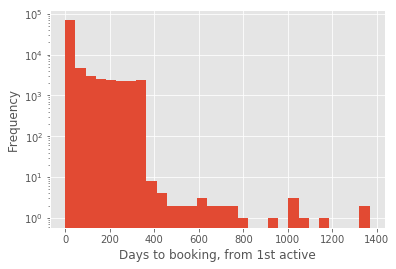

In [234]:
train_users['days_to_booking2'].plot(kind='hist',bins=30)
plt.yscale('log')
plt.xlabel('Days to booking, from 1st active')

Text(0.5, 0, 'Days to booking, from 1st active')

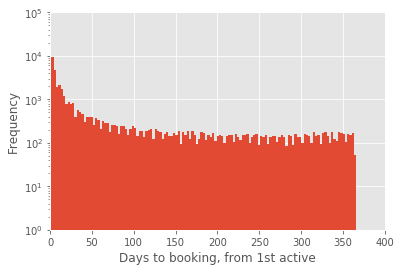

In [235]:
train_users['days_to_booking2'].plot(kind='hist',bins=500)
plt.yscale('log')
plt.axis([0,400,1e0,1e5])
plt.xlabel('Days to booking, from 1st active')

Text(0.5, 0, 'Days to booking, from 1st active')

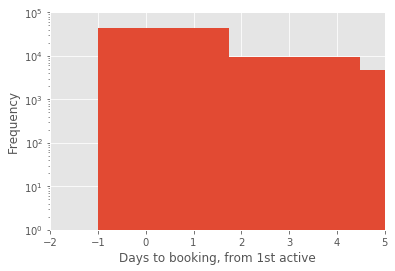

In [236]:
train_users['days_to_booking2'].plot(kind='hist',bins=500)
plt.yscale('log')
plt.axis([-2,5,1e0,1e5])
plt.xlabel('Days to booking, from 1st active')

In [237]:
train_users['time_to_booking2'].describe()

count                      88908
mean     44 days 03:51:50.874656
std      88 days 11:28:55.261149
min            -1 days +00:01:17
25%              0 days 00:26:18
50%              2 days 05:52:44
75%      28 days 22:52:50.750000
max           1368 days 06:33:01
Name: time_to_booking2, dtype: object

In [238]:
train_users['days_to_booking2'].describe()

count    88908.000000
mean        43.692176
std         88.482784
min         -1.000000
25%          0.000000
50%          2.000000
75%         28.000000
max       1368.000000
Name: days_to_booking2, dtype: float64

<div class="span5 alert alert-success">
<p> A large number of people book within the first 2 days (the median). There's also a steep dropoff at 365, which needs to be better understood. Perhaps the threshold for slow vs. fast bookers should be 2 days; that would divide the data into 2 roughly equal-sized groups. </p>
</div>

In [239]:
# Set negative times to zero
train_users.loc[train_users['time_to_booking2']<timedelta(0,0,0),['time_to_booking2']] = timedelta(0,0,0)
train_users.loc[train_users['days_to_booking2']<0,['days_to_booking2']] = 0

In [240]:
train_users['slow_bookers'] = train_users['time_to_booking2'] > timedelta(2,0,0)
train_users['time_to_booking2'].describe()

count                      88908
mean     44 days 06:19:39.117987
std      88 days 10:14:29.277848
min              0 days 00:00:00
25%              0 days 00:26:18
50%              2 days 05:52:44
75%      28 days 22:52:50.750000
max           1368 days 06:33:01
Name: time_to_booking2, dtype: object

In [241]:
train_users[['slow_bookers','time_to_booking2']].head(10)

,slow_bookers,time_to_booking2
0,False,NaT
1,False,NaT
2,True,418 days 00:47:13
3,True,1042 days 17:58:31
4,True,71 days 17:48:55
5,False,0 days 02:03:41
6,True,2 days 22:34:02
7,True,9 days 04:40:55
8,True,205 days 23:17:49
9,False,0 days 00:00:00


In [242]:
train_users.groupby('slow_bookers').mean()

,age,signup_flow,days_to_booking,days_to_booking2
slow_bookers,,,,
False,36.855307,3.421593,0.617813,0.152744
True,35.876390,2.709277,84.784371,84.387522


<div class="span5 alert alert-success">

</p>We'll use the equation below to calculate statistical significance between 2 samples.
 
$$z = \frac{(\bar{x}_M - \bar{x}_F) - 0}{\sqrt{\frac{\sigma_M^2}{n_M} + \frac{\sigma_F^2}{n_F}}}$$</p>
</div>

In [243]:
signup_flows = train_users.groupby('slow_bookers').signup_flow.describe()
signup_flows

,count,mean,std,min,25%,50%,75%,max
slow_bookers,,,,,,,,
False,167242.0,3.421593,7.803405,0.0,0.0,0.0,0.0,25.0
True,46209.0,2.709277,6.976964,0.0,0.0,0.0,0.0,25.0


<div class="span5 alert alert-success">
<p> Let's see if there's a statistically significant signup_flow difference between the slow and fast bookers. </p>
</div>

In [244]:
mean_fast_signup = signup_flows.iloc[0,1]
mean_slow_signup = signup_flows.iloc[1,1]
std_fast_signup = signup_flows.iloc[0,2]
std_slow_signup = signup_flows.iloc[1,2]
n_fast_signup = signup_flows.iloc[0,0]
n_slow_signup = signup_flows.iloc[1,0]

In [245]:
# Calculate z value between two groups
z_signup = (mean_fast_signup-mean_slow_signup) / np.sqrt(((std_fast_signup ** 2)/ n_fast_signup) + ((std_slow_signup ** 2)/ n_slow_signup))
z_signup

18.91932081407141

<div class="span5 alert alert-success">
<p> Let's see if there's an age difference between the slow and fast bookers. </p>
</div>

In [246]:
ages = train_users.groupby('slow_bookers').age.describe()
ages

,count,mean,std,min,25%,50%,75%,max
slow_bookers,,,,,,,,
False,85837.0,36.855307,11.995410,15.0,28.0,34.0,43.0,100.0
True,37222.0,35.876390,10.925047,15.0,28.0,33.0,41.0,100.0


In [247]:
mean_fast = ages.iloc[0,1]
mean_slow = ages.iloc[1,1]
std_fast = ages.iloc[0,2]
std_slow = ages.iloc[1,2]
n_fast = ages.iloc[0,0]
n_slow = ages.iloc[1,0]

In [248]:
# Calculate z value between two groups
z = (mean_fast-mean_slow) / np.sqrt(((std_fast ** 2)/ n_fast) + ((std_slow ** 2)/ n_slow))
z

14.00894718307347

<div class="span5 alert alert-success">
<p> The z value for the difference in age between the slow bookers and fast bookers is 14, which means the difference is statistically significant and likely isn't due to chance. </p>
</div>

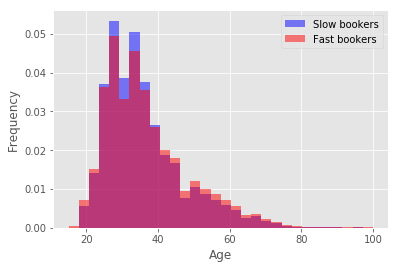

In [249]:
# Plot a histogram of the age.
train_users[train_users['slow_bookers']==True]['age'].hist(alpha=0.5,color='blue',density=True,bins=30)
train_users[train_users['slow_bookers']==False]['age'].hist(alpha=0.5,color='red',density=True,bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Slow bookers','Fast bookers'])

In [250]:
slows = train_users[(train_users['slow_bookers']==True)]
fasts = train_users[train_users['slow_bookers']==False]
slowx,slowy=ecdf(slows['age'])
fastx,fasty=ecdf(fasts['age'])

In [251]:
slows2 = slows[~slows['age'].isna()]
fasts2 = fasts[~fasts['age'].isna()]
slowx2,slowy2=ecdf(slows2['age'])
fastx2,fasty2=ecdf(fasts2['age'])

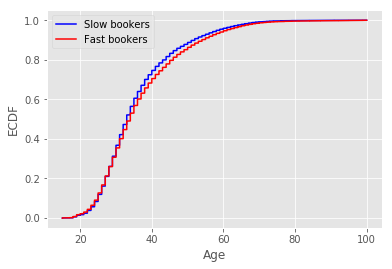

In [252]:
# ECDF of Age, for slow and fast bookers
plt.plot(slowx2,slowy2,color='blue')
plt.plot(fastx2,fasty2,color='red')
plt.xlabel('Age')
plt.ylabel('ECDF')
plt.legend(['Slow bookers','Fast bookers'])

<div class="span5 alert alert-success">
<p> Let's make some violin plots to assess the data further. </p>
</div>

/Users/Anthony/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


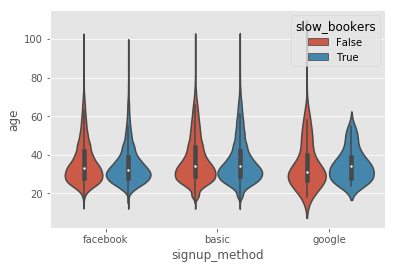

In [253]:
sns.violinplot(x='signup_method',y='age',data=train_users,hue='slow_bookers')

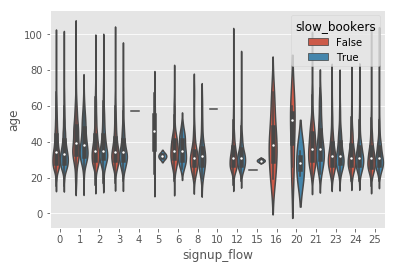

In [254]:
sns.violinplot(x='signup_flow',y='age',data=train_users,hue='slow_bookers')

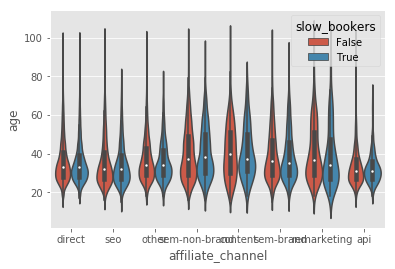

In [255]:
sns.violinplot(x='affiliate_channel',y='age',data=train_users,hue='slow_bookers')

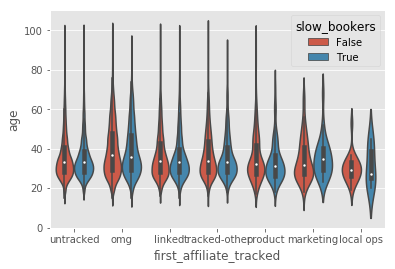

In [256]:
sns.violinplot(x='first_affiliate_tracked',y='age',data=train_users,hue='slow_bookers')

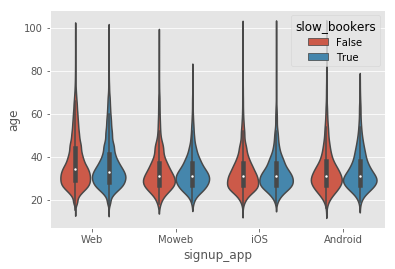

In [257]:
sns.violinplot(x='signup_app',y='age',data=train_users,hue='slow_bookers')

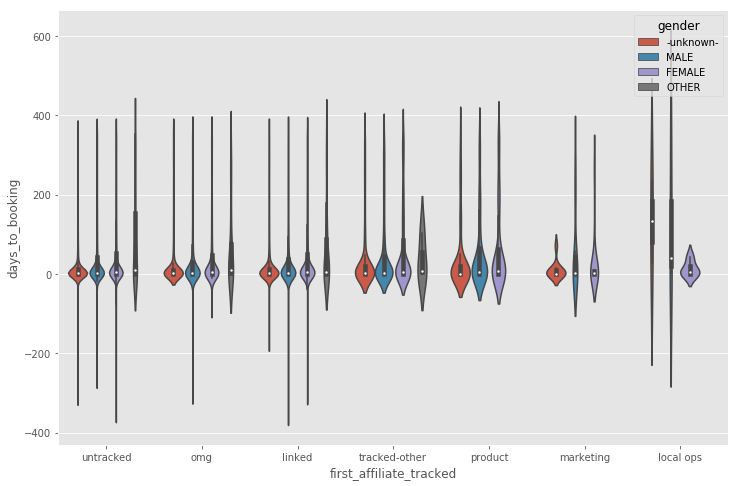

In [258]:
fig = plt.figure(figsize=(12, 8))
sns.violinplot(x='first_affiliate_tracked',y='days_to_booking',data=train_users,hue='gender')

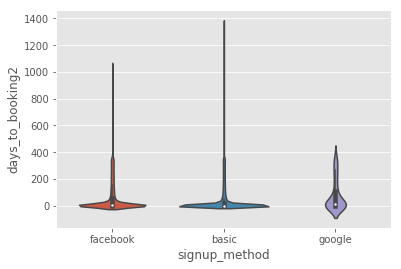

In [259]:
sns.violinplot(x='signup_method',y='days_to_booking2',data=train_users)

<div class="span5 alert alert-success">
<p> Let's look at who made a booking BEFORE creating an account. </p>
</div>

In [260]:
train_users[train_users['date_first_booking'] < train_users['date_account_created']].head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,time_to_booking,time_to_booking2,days_to_booking,days_to_booking2,slow_bookers
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,untracked,Web,Windows Desktop,IE,US,-57 days,418 days 00:47:13,-57.0,418.0,True
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,untracked,Web,Mac Desktop,Chrome,US,-208 days,71 days 17:48:55,-208.0,71.0,True
120,swrvyedlsp,2010-05-30,2010-02-18 00:41:09,2010-03-17,FEMALE,NaN,facebook,0,en,direct,...,omg,Web,Mac Desktop,Safari,US,-74 days,26 days 23:18:51,-74.0,26.0,True
357,adq42kzmnv,2010-12-23,2010-04-05 15:35:24,2010-04-06,MALE,38.0,basic,2,en,direct,...,untracked,Web,Mac Desktop,Firefox,US,-261 days,0 days 08:24:36,-261.0,0.0,False
365,176898y1ju,2011-03-28,2010-04-06 19:02:10,2010-04-15,FEMALE,44.0,basic,0,en,direct,...,untracked,Web,Mac Desktop,Firefox,US,-347 days,8 days 04:57:50,-347.0,8.0,True


<div class="span5 alert alert-success">
<p> Let's assess the Sessions table. </p>
</div>

In [261]:
sessions.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [262]:
useractions = sessions.groupby('user_id').count()
useractions.head()

,action,action_type,action_detail,device_type,secs_elapsed
user_id,,,,,
00023iyk9l,39,37,37,40,39
0010k6l0om,63,48,48,63,62
001wyh0pz8,90,85,85,90,89
0028jgx1x1,31,31,31,31,30
002qnbzfs5,782,712,712,789,788


In [263]:
# Isolate each user's different action types.
useractions2 = sessions.groupby(['user_id','action']).count()
useractions2.head()

action_type  action_detail  device_type  \
user_id    action                                                           
00023iyk9l ajax_refresh_subtotal            2              2            2   
           callback                         1              1            1   
           confirm_email                    1              1            1   
           dashboard                        4              4            4   
           header_userpic                   2              2            2   

                                  secs_elapsed  
user_id    action                               
00023iyk9l ajax_refresh_subtotal             2  
           callback                          0  
           confirm_email                     1  
           dashboard                         4  
           header_userpic                    2

<div class="span5 alert alert-success">
<p> Let's merge the grouped Sessions table with the train_users table.
    
   There's a large group of people in train_users who never made a booking. They are lumped in with slow bookers.
    
    
   </p>
</div>

In [264]:
train_users_sessions = pd.merge(train_users,useractions,left_on='id',right_on = 'user_id',how='left')
TUS = train_users_sessions

In [265]:
TUS.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,time_to_booking,time_to_booking2,days_to_booking,days_to_booking2,slow_bookers,action,action_type,action_detail,device_type,secs_elapsed
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,...,NaT,NaT,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,NaT,NaT,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,-57 days,418 days 00:47:13,-57.0,418.0,True,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,278 days,1042 days 17:58:31,278.0,1042.0,True,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,-208 days,71 days 17:48:55,-208.0,71.0,True,NaN,NaN,NaN,NaN,NaN
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,...,1 days,0 days 02:03:41,1.0,0.0,False,NaN,NaN,NaN,NaN,NaN
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,...,3 days,2 days 22:34:02,3.0,2.0,True,NaN,NaN,NaN,NaN,NaN
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,10 days,9 days 04:40:55,10.0,9.0,True,NaN,NaN,NaN,NaN,NaN
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,...,206 days,205 days 23:17:49,206.0,205.0,True,NaN,NaN,NaN,NaN,NaN
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.0,basic,0,en,other,...,0 days,0 days 00:00:00,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN


In [266]:
useractions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135483 entries, 00023iyk9l to zzzlylp57e
Data columns (total 5 columns):
action           135483 non-null int64
action_type      135483 non-null int64
action_detail    135483 non-null int64
device_type      135483 non-null int64
secs_elapsed     135483 non-null int64
dtypes: int64(5)
memory usage: 6.2+ MB


In [267]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 21 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     213451 non-null object
age                        123059 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
time_to_booking            88908 non-null timedelta64[ns]
time_to_

In [268]:
TUS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 26 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     213451 non-null object
age                        123059 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
time_to_booking            88908 non-null timedelta64[ns]
time_to_

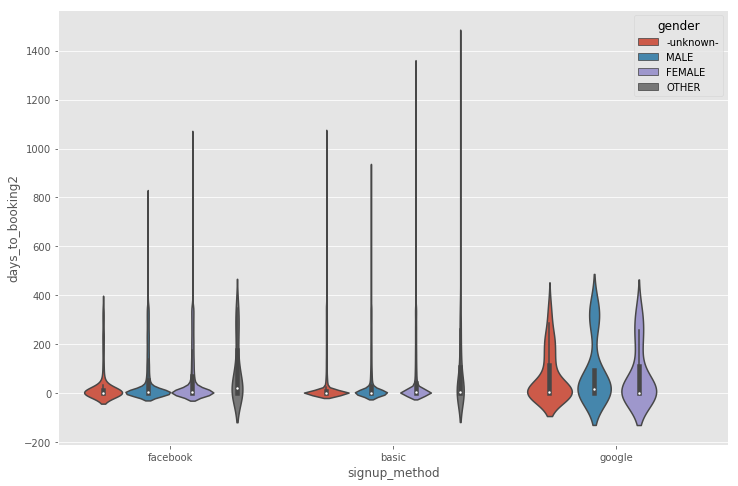

In [269]:
fig = plt.figure(figsize=(12, 8))
sns.violinplot(x='signup_method',y='days_to_booking2',data=TUS,hue='gender')

In [270]:
TUS.signup_app.value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

In [271]:
TUS.signup_flow.value_counts()

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

In [272]:
TUS.signup_method.value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

In [273]:
TUS.language.value_counts().head()

en    206314
zh      1632
fr      1172
es       915
ko       747
Name: language, dtype: int64

In [274]:
TUS.age.value_counts().head()

30.0    6124
31.0    6016
29.0    5963
28.0    5939
32.0    5855
Name: age, dtype: int64

In [275]:
train_users.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [276]:
TUS.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [277]:
TUS.first_affiliate_tracked.value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [278]:
TUS.first_browser.value_counts().head(10)

Chrome             63845
Safari             45169
Firefox            33655
-unknown-          27266
IE                 21068
Mobile Safari      19274
Chrome Mobile       1270
Android Browser      851
AOL Explorer         245
Opera                188
Name: first_browser, dtype: int64

In [279]:
TUS.first_device_type.value_counts().head(10)

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [280]:
TUS.groupby('slow_bookers').mean()

,age,signup_flow,days_to_booking,days_to_booking2,action,action_type,action_detail,device_type,secs_elapsed
slow_bookers,,,,,,,,,
False,36.855307,3.421593,0.617813,0.152744,71.862989,64.676961,64.676961,72.552310,71.552310
True,35.876390,2.709277,84.784371,84.387522,84.189033,74.434797,74.434797,84.922394,83.922394


In [281]:
TUS.slow_bookers.value_counts()

False    167242
True      46209
Name: slow_bookers, dtype: int64

In [282]:
for i in range(0,9):
    tmp_m1 = TUS.groupby('slow_bookers').mean().iloc[0,i]
    tmp_m2 = TUS.groupby('slow_bookers').mean().iloc[1,i]
    tmp_s1 = TUS.groupby('slow_bookers').std().iloc[0,i]
    tmp_s2 = TUS.groupby('slow_bookers').std().iloc[1,i]
    tmp_n1 = TUS.groupby('slow_bookers').count().iloc[0,i]
    tmp_n2 = TUS.groupby('slow_bookers').count().iloc[1,i]
    z = (tmp_m1-tmp_m2) / np.sqrt(((tmp_s1 ** 2)/ tmp_n1) + ((tmp_s2 ** 2)/ tmp_n2))
    print(TUS.groupby('slow_bookers').mean().columns[i],z)

age 16.68228835343774
signup_flow 18.91932081406796
days_to_booking -170.02700771126067
days_to_booking2 -168.01331412230005
action -19.718607318251923
action_type -15.100673525245277
action_detail -17.707950803407606
device_type -19.70817762460127
secs_elapsed -19.70817762460127


<div class="span5 alert alert-success">
<p> It appears as if all the difference between the slow and fast bookers for all of these columns are statistically significant. </p>
</div>

In [283]:
TUS.corr()

,age,signup_flow,days_to_booking,days_to_booking2,slow_bookers,action,action_type,action_detail,device_type,secs_elapsed
age,1.000000,-0.095128,-0.026051,-0.024470,-0.038462,-0.026361,-0.029511,-0.029511,-0.026582,-0.026582
signup_flow,-0.095128,1.000000,0.055053,0.054890,-0.038410,0.040370,0.062403,0.062403,0.038500,0.038500
days_to_booking,-0.026051,0.055053,1.000000,0.988253,0.480582,-0.037001,-0.040695,-0.040695,-0.038545,-0.038545
days_to_booking2,-0.024470,0.054890,0.988253,1.000000,0.476276,-0.037123,-0.040768,-0.040768,-0.038661,-0.038661
slow_bookers,-0.038462,-0.038410,0.480582,0.476276,1.000000,0.044000,0.039075,0.039075,0.043956,0.043956
action,-0.026361,0.040370,-0.037001,-0.037123,0.044000,1.000000,0.991963,0.991963,0.999903,0.999903
action_type,-0.029511,0.062403,-0.040695,-0.040768,0.039075,0.991963,1.000000,1.000000,0.992118,0.992118
action_detail,-0.029511,0.062403,-0.040695,-0.040768,0.039075,0.991963,1.000000,1.000000,0.992118,0.992118
device_type,-0.026582,0.038500,-0.038545,-0.038661,0.043956,0.999903,0.992118,0.992118,1.000000,1.000000
secs_elapsed,-0.026582,0.038500,-0.038545,-0.038661,0.043956,0.999903,0.992118,0.992118,1.000000,1.000000


# Data Modeling

In [340]:
from sklearn.linear_model import LinearRegression as LinR
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, classification_report
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
import sklearn.model_selection
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
import category_encoders as ce
import pickle
from sklearn.model_selection import GridSearchCV as GSCV, RandomizedSearchCV as RSCV
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [285]:
def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])
def run_logR(X, Xtest, y, ytest,solver):
    """Runs Logistic regression model"""
    y=y[:,0]
    mod = LogR(solver=solver,max_iter=1000)
    mod.fit(X,y)
    print(accuracy_score(mod.predict(Xtest), ytest))
    return mod
def run_model(model,X, Xtest, y, ytest,**kwargs):
    """Runs generic model"""
    mod = model(**kwargs)
    mod.fit(X,y)
    print(mod)
    print('Traning AUC = ',roc_auc_score(y, mod.predict(X) ))
    print('Testing AUC = ',roc_auc_score(ytest, mod.predict(Xtest) ))
    return mod
def cv_score(clf, x, y, score_func=accuracy_score):
    """Does cross-validation for input model"""
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func( y[test],clf.predict(x[test])) # evaluate score function on held-out data
    return result / nfold # average
def do_precision_recall_curve(y_actual,y_predicted):
    """Displays precision/recall vs. threshold curve"""
    precision, recall, thresholds = precision_recall_curve(y_actual, y_predicted) 
    pr_auc = metrics.auc(recall, precision)
    plt.title("Precision-Recall vs Threshold Chart")
    plt.plot(thresholds, precision[: -1], "b--", label="Precision")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.ylabel("Precision, Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0,1])
def calc_auc_vs_threshold(y_actual,y_pred):
    """Displays ROC AUC vs. threshold"""
    pred_proba_df = pd.DataFrame(y_pred)
    threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5] # ,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
    aucs = []
    accs = []
    for i in threshold_list:
        print ('******** For i = {} ******'.format(i))
        Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
        accuracy = metrics.accuracy_score(y_actual, Y_test_pred)
        auc = metrics.roc_auc_score(y_actual, Y_test_pred)
        aucs.append(auc)
        accs.append(accuracy)
        #print('Accuracy is {}'.format(accuracy))        
        #print('AUC is {}'.format(auc))
        print(confusion_matrix(y_actual,Y_test_pred))
    plt.plot(threshold_list,aucs,marker='o',color='r')
    plt.plot(threshold_list,accs,marker='o',color='b')
    plt.legend(['AUC','Accuracy'])
    plt.xlabel('Threshold')
    plt.ylabel('Metric')
    #plt.show()
def do_auc_prec_recall(y_actual,y_pred,show_confusion):
    """Displays Precision, Recall, AUC, Accuracy vs. Threshold"""
    precision, recall, thresholds = precision_recall_curve(y_actual, y_pred) 
    pr_auc = metrics.auc(recall, precision)
    #plt.title("Precision-Recall vs Threshold Chart")
    plt.plot(thresholds, precision[: -1], "b--", label="Precision")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    #plt.ylabel("Precision, Recall")
    #plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0,1])
    pred_proba_df = pd.DataFrame(y_pred)
    threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,.55,.6,.65,.7,.75,.8,.85] # ,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
    aucs = []
    accs = []
    for i in threshold_list:
        
        Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
        accuracy = metrics.accuracy_score(y_actual, Y_test_pred)
        auc = metrics.roc_auc_score(y_actual, Y_test_pred)
        aucs.append(auc)
        accs.append(accuracy)
        if show_confusion == 1:
            print ('******** For i = {} ******'.format(i))
            print(confusion_matrix(y_actual,Y_test_pred))
    plt.plot(threshold_list,aucs,marker='o',color='r')
    plt.plot(threshold_list,accs,marker='o',color='b')
    plt.legend(['AUC','Accuracy'])
    plt.xlabel('Threshold')
    plt.ylabel('Metric')
    plt.legend(['Precision','Recall','AUC','Accuracy'])


def get_metrics(mod,Xtrain,Xtest,ytrain,ytest,thresh):
    """Display ROC AUC and confusion matrix for input model"""
    
    #Training SET
    print('TRAINING SET')
    y_pred2 = mod.predict_proba(Xtrain)[:,1]
    y_pred2[y_pred2>thresh]=1
    y_pred2[y_pred2<1]=0
    print('AUC = ' , roc_auc_score(ytrain, y_pred2))
    print(confusion_matrix(ytrain,y_pred2))

    #TESTING SET
    print('TEST SET')
    y_pred2 = mod.predict_proba(Xtest)[:,1]
    y_pred2[y_pred2>thresh]=1
    y_pred2[y_pred2<1]=0
    print('AUC = ' , roc_auc_score(ytest, y_pred2))
    print(confusion_matrix(ytest,y_pred2))    
    return 
def cv_score(clf, x, y, score_func=accuracy_score):
    """Cross validation for input model"""
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        y_prob_tmp = mod.predict(x[test])
        result += score_func(y[test],y_prob_tmp ) # evaluate score function on held-out data
    return result / nfold # average
def cv_score_prob(clf, x, y,thresh, score_func):
    """Cross validation for input model, with variable threshold"""
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        y_prob_tmp = clf.predict_proba(x[test])[:,1]
        y_prob_tmp[y_prob_tmp>thresh]=1
        y_prob_tmp[y_prob_tmp<1]=0
        try:
            result += score_func(y[test],y_prob_tmp ) # evaluate score function on held-out data
        except:
            result += 0
            print('AUC 0')
    return result / nfold # average

In [286]:
TUS2 = TUS.drop('days_to_booking2', axis = 1)
TUS2.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'time_to_booking',
       'time_to_booking2', 'days_to_booking', 'slow_bookers', 'action',
       'action_type', 'action_detail', 'device_type', 'secs_elapsed'],
      dtype='object')

In [287]:
# Create y (dependent variable)
y = pd.DataFrame(TUS2.loc[:,'slow_bookers'])
y.slow_bookers[y.slow_bookers==False]=0

# y2. For users that never made a booking, set slow_bookers to 2
y2 = y.copy()
y2.slow_bookers[TUS2.time_to_booking2 != TUS2.time_to_booking2] = 2
pd.DataFrame(y2).slow_bookers.value_counts()

2.0    124543
1.0     46209
0.0     42699
Name: slow_bookers, dtype: int64

In [288]:
# Use OneHotEncoding to make categorical features into their own binary columns
encoder = ce.OneHotEncoder(cols=['gender','language',
       'first_affiliate_tracked','signup_method','affiliate_channel',
                                 'first_browser','affiliate_provider','signup_app'])
encoder1 = ce.OneHotEncoder(cols=['gender','language',
       'first_affiliate_tracked','signup_method','affiliate_channel',
                                 'first_browser','affiliate_provider','signup_app'])
encoder2 = ce.OneHotEncoder(cols=['gender','language',
       'first_affiliate_tracked','signup_method','affiliate_channel',
                                 'first_browser','affiliate_provider','signup_app'])
X = TUS2.loc[:,['gender','age','language',
       'first_affiliate_tracked','signup_method','affiliate_channel','first_browser',
                'signup_flow','affiliate_provider','signup_app','action']]

#remove people who don't make booking
yedit = y2.copy()
Xedit = X.copy()
Xedit = Xedit[yedit.slow_bookers != 2]
yedit = yedit[yedit.slow_bookers != 2]

encoder1.fit(Xedit, yedit)
X_cleaned1 = encoder1.transform(Xedit)
X_cleaned1.age = X_cleaned1.age.fillna(X_cleaned1.age.median())
X_cleaned1.action = X_cleaned1.action.replace(np.NaN,0)
Xtr1, Xte1, ytr1, yte1 = TTS(X_cleaned1.values,yedit.slow_bookers.values,random_state=5)

# remove people who made fast booking
yedit2 = y2.copy()
Xedit2 = X.copy()
Xedit2 = Xedit2[yedit2.slow_bookers != 0]
yedit2 = yedit2[yedit2.slow_bookers != 0]
yedit2[yedit2==1] = 0
yedit2[yedit2==2] = 1

encoder2.fit(Xedit2, yedit2)
X_cleaned2 = encoder2.transform(Xedit2)
X_cleaned2.age = X_cleaned2.age.fillna(X_cleaned2.age.median())
X_cleaned2.action = X_cleaned2.action.replace(np.NaN,0)
Xtr2, Xte2, ytr2, yte2 = TTS(X_cleaned2.values,yedit2.slow_bookers.values,random_state=5)

#all data
encoder.fit(X, y)
X_cleaned = encoder.transform(X)
X_cleaned.age = X_cleaned.age.fillna(X_cleaned.age.median())
X_cleaned.action = X_cleaned.action.replace(np.NaN,0)
Xtr, Xte, ytr, yte = TTS(X_cleaned.values,y.slow_bookers.values,random_state=5)

/Users/Anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Traning AUC =  0.5583717071331531
Testing AUC =  0.5568263574873378
[[ 2014  9526]
 [ 1896 29252]]
                              coeff
affiliate_provider_3      -0.486442
language_8                -0.406453
gender_4                  -0.319977
first_browser_1           -0.313147
first_browser_3           -0.307663
language_1                -0.292695
affiliate_provider_5      -0.249294
first_browser_4           -0.225002
affiliate_channel_1       -0.188579
first_affiliate_tracked_1 -0.181187
affiliate_channel_2       -0.156454
affiliate_provider_12     -0.148374
affiliate_provider_15     -0.144340
affiliate_provider_2      -0.134328
gender_3                  -0.127763
language_3                -0.126299
language_7             

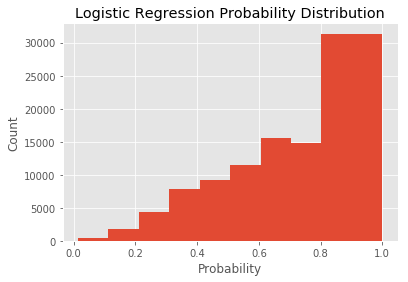

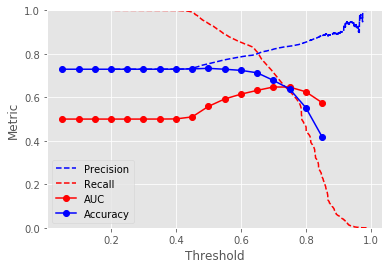

In [290]:
# Logistic Regression Classifier
modbig2 = run_model(LogR,Xtr2, Xte2, ytr2, yte2,solver='lbfgs',max_iter=1000)
print(confusion_matrix(yte2,modbig2.predict(Xte2)))
coeffs = pd.DataFrame(modbig2.coef_[0],index=X_cleaned2.columns,columns=['coeff'])
coeffs.head()
print(coeffs.sort_values(by=['coeff']))
plt.hist(modprobs[:,1])
plt.title('Logistic Regression Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
modprobs = modbig2.predict_proba(Xtr2)
y_pred = modprobs[:,1]
do_auc_prec_recall(ytr2,y_pred,show_confusion=0)


<div class="span5 alert alert-success">
<p> 
   With a default threshold 0.5, we get an ROC AUC of 0.55. Based on the plot of ROC AUC and accuracy vs. threshold, it is clear that at a threshold of around 0.45 or below, there is overfitting. Because the classes are imbalanced, the area under the ROC curve (ROC AUC) is a better metric to use than accuracy. The maximum ROC AUC occurs around a threshold of 0.75.

Furthermore, the coefficient values are displayed in the chart above, so we can see which variables have the greatest effect on the booking speed. The most important variables seem to be gender, affiliate_channel, signup_method, and language.

Thus, to improve the model, we can try setting the threshold to 0.75, as well as by carrying out a cross-validation in order to help avoid overfitting.
   
   </p>
</div>

In [291]:
thresh_set = 0.75
tmp_score = cv_score_prob(LogR(solver='liblinear'), Xtr2,ytr2,thresh=thresh_set, score_func=roc_auc_score)
print('ROC AUC = ',tmp_score)

ROC AUC =  0.6464905134511159


<div class="span5 alert alert-success">
<p> 
   Now the ROC AUC is 0.65, which is an improvement. But we can do better, possibly by moving to Random Forest Classifiers. 
   
   </p>
</div>

In [292]:
# Try random forest
rfc = RFC(n_estimators = 100)
tmp_score = cv_score_prob(rfc, Xtr2,ytr2,thresh=thresh_set, score_func=roc_auc_score)
print('ROC AUC = ',tmp_score)

ROC AUC =  0.6582440700034395


<div class="span5 alert alert-success">
<p> 
   With a random forest, now the ROC AUC is 0.66, which is again a very slight improvement. Let's fine tune the hyperparameters with the help of RandomizedSearchCV and GridSearchCV.
   
   </p>
</div>

In [293]:
direc = '/Users/Anthony/Documents/Bootcamp/Capstone_1/'

In [294]:
rfc = RFC() 
from scipy.stats import randint as sp_randint
param_grid = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(50,200)}
filename = 'mod_gscv_xtr2_2.p'
exists = os.path.isfile(direc+filename)
if exists:
    mod_gscv2 = pickle.load( open( direc+filename, "rb" ) )
else:
    mod_gscv2 = RSCV(estimator=rfc, param_distributions=param_grid, n_iter=10, cv=3,scoring='roc_auc',verbose=50)
    mod_gscv2.fit(Xtr2,ytr2) 
    pickle.dump( mod_gscv2, open( direc+filename, "wb" ) ) 
print('Best ROC AUC score = ',mod_gscv2.best_score_)
print(mod_gscv2.best_estimator_)
print(mod_gscv2.best_params_)
y_pred = mod_gscv2.predict(Xte2)
get_metrics(mod_gscv2,Xtr2,Xte2,ytr2,yte2,thresh = 0.75)

Best ROC AUC score =  0.717213207040365
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=67, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'bootstrap': True, 'max_depth': None, 'max_features': 6, 'min_samples_split': 8, 'n_estimators': 67}
TRAINING SET
AUC =  0.7848767763710682
[[29889  4780]
 [27306 66089]]
TEST SET
AUC =  0.6796367273456472
[[ 8367  3173]
 [11393 19755]]


<div class="span5 alert alert-success">
<p> 
   With RandomizedSearchCV, we get a new best ROC AUC score of 0.72.
   
   </p>
</div>

In [295]:
rfc = RFC() 
from scipy.stats import randint as sp_randint
param_grid = {"max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "n_estimators": sp_randint(50,200)}
filename = 'mod_gscv_xtr2_3.p'
exists = os.path.isfile(direc+filename)
if exists:
    mod_gscv2 = pickle.load( open( direc+filename, "rb" ) )
else:
    mod_gscv2 = RSCV(estimator=rfc, param_distributions=param_grid, n_iter=10, cv=3,scoring='roc_auc',verbose=50)
    mod_gscv2.fit(Xtr2,ytr2) 
    pickle.dump( mod_gscv2, open( direc+filename, "wb" ) ) 
print('Best ROC AUC score = ',mod_gscv2.best_score_)
print(mod_gscv2.best_estimator_)
print(mod_gscv2.best_params_)
get_metrics(mod_gscv2.best_estimator_,Xtr2,Xte2,ytr2,yte2,thresh = 0.7)

Best ROC AUC score =  0.7220984164017651
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=189, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'max_features': 9, 'min_samples_split': 9, 'n_estimators': 189}
TRAINING SET
AUC =  0.7932091642517857
[[28362  6307]
 [21636 71759]]
TEST SET
AUC =  0.6744098060158478
[[ 7578  3962]
 [ 9589 21559]]


In [296]:
get_metrics(mod_gscv2.best_estimator_,Xtr2,Xte2,ytr2,yte2,thresh = 0.5)

TRAINING SET
AUC =  0.7346176686673891
[[18059 16610]
 [ 4825 88570]]
TEST SET
AUC =  0.6063082963451284
[[ 3714  7826]
 [ 3402 27746]]


ROC AUC =  0.669963745958041


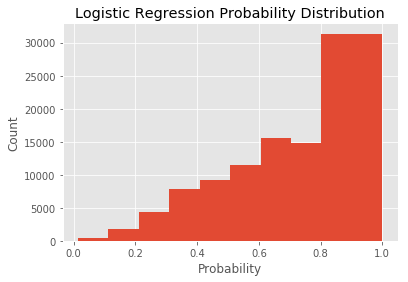

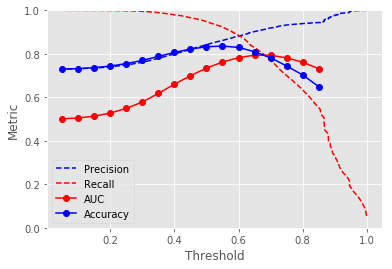

In [297]:
# Try random forest with optimal hyperparameters
rfc = RFC(n_estimators = 189,max_features=9,min_samples_split=9)
tmp_score = cv_score_prob(rfc, Xtr2,ytr2,thresh=0.7, score_func=roc_auc_score)
print('ROC AUC = ',tmp_score)
modprobs = mod_gscv2.best_estimator_.predict_proba(Xtr2)
plt.hist(modprobs[:,1])
plt.title('Logistic Regression Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
y_pred = modprobs[:,1]
do_auc_prec_recall(ytr2,y_pred,show_confusion=0)

In [327]:
# Try Monte Carlo algorithm to optimize further
n_estimators_tmp = 163
min_samples_leaf_tmp = 3
max_depth_tmp = 22
best_score = 0
thresh_tmp = 0.73 
if 0:
    while best_score < 0.9:
        print('----- Running -----')
        rfc_tmp = RFC(n_estimators = n_estimators_tmp,max_depth = max_depth_tmp,min_samples_leaf=min_samples_leaf_tmp)
        tmp_score = cv_score_prob(rfc_tmp, Xtr2,ytr2,thresh=thresh_tmp, score_func=roc_auc_score)
        if tmp_score >= best_score:
            best_score = tmp_score
            print('======= New best AUC score = ',best_score)
            print('threshold = ',thresh_tmp)
            print('n_estimators = ',n_estimators_tmp)
            print('max_depth = ',max_depth_tmp)
            print('min_samples_leaf = ',min_samples_leaf_tmp)
            n_estimators_old = n_estimators_tmp
            max_depth_old = max_depth_tmp
            min_samples_leaf_old = min_samples_leaf_tmp
            thresh_old = thresh_tmp
        else:
            n_estimators_tmp = n_estimators_old
            max_depth_tmp = max_depth_old
            min_samples_leaf = min_samples_leaf_old
            thresh_tmp = thresh_old

        thresh_tmp = thresh_old + random.gauss(0,0.01)
        n_estimators_tmp = n_estimators_old + int(random.gauss(0,4))  #(2*random.randint(1,2)-3)*randint
        max_depth_tmp = max_depth_old + int(random.gauss(0,2))
        min_samples_leaf = min_samples_leaf_old + int(random.gauss(0,1))
        

In [ ]:
# Try Monte Carlo algorithm to optimize further
n_estimators_tmp = 189
min_samples_split_tmp = 9
max_features_tmp = 9
best_score = 0
thresh_tmp = 0.73 

while best_score < 0.9:
    print('----- Running -----')
    rfc_tmp = RFC(n_estimators = n_estimators_tmp,max_features = max_features_tmp,min_samples_split=min_samples_split_tmp)
    tmp_score = cv_score_prob(rfc_tmp, Xtr2,ytr2,thresh=thresh_tmp, score_func=roc_auc_score)
    if tmp_score >= best_score:
        best_score = tmp_score
        print('======= New best AUC score = ',best_score)
        print('threshold = ',thresh_tmp)
        print('n_estimators = ',n_estimators_tmp)
        print('max_depth = ',max_features_tmp)
        print('min_samples_leaf = ',min_samples_split_tmp)
        n_estimators_old = n_estimators_tmp
        max_features_old = max_features_tmp
        min_samples_split_old = min_samples_split_tmp
        thresh_old = thresh_tmp
    else:
        n_estimators_tmp = n_estimators_old
        max_features_tmp = max_features_old
        min_samples_split = min_samples_split_old
        thresh_tmp = thresh_old

    thresh_tmp = thresh_old + random.gauss(0,0.01)
    n_estimators_tmp = n_estimators_old + int(random.gauss(0,4))  #(2*random.randint(1,2)-3)*randint
    max_features_tmp = max_features_old + int(random.gauss(0,2))
    min_samples_split = min_samples_split_old + int(random.gauss(0,1))

In [ ]:
# Try Monte Carlo algorithm to optimize further
n_estimators_tmp = 194
min_samples_split_tmp = 9
max_features_tmp = 16
best_score = 0
thresh_tmp = 0.73
while best_score < 0.9:
    print('----- Running -----')
    rfc_tmp = RFC(max_depth =22,min_samples_leaf=3,n_estimators = n_estimators_tmp,max_features = max_features_tmp,min_samples_split=min_samples_split_tmp)
    tmp_score = cv_score_prob(rfc_tmp, Xtr2,ytr2,thresh=thresh_tmp, score_func=roc_auc_score)
    if tmp_score >= best_score:
        best_score = tmp_score
        print('======= New best AUC score = ',best_score)
        print('threshold = ',thresh_tmp)
        print('n_estimators = ',n_estimators_tmp)
        print('max_depth = ',max_features_tmp)
        print('min_samples_leaf = ',min_samples_split_tmp)
        n_estimators_old = n_estimators_tmp
        max_features_old = max_features_tmp
        min_samples_split_old = min_samples_split_tmp
        thresh_old = thresh_tmp
    else:
        n_estimators_tmp = n_estimators_old
        max_features_tmp = max_features_old
        min_samples_split = min_samples_split_old
        thresh_tmp = thresh_old

    thresh_tmp = thresh_old + random.gauss(0,0.01)
    n_estimators_tmp = n_estimators_old + int(random.gauss(0,4))  #(2*random.randint(1,2)-3)*randint
    max_features_tmp = max_features_old + int(random.gauss(0,2))
    min_samples_split = min_samples_split_old + int(random.gauss(0,1))

In [ ]:
# Try Monte Carlo algorithm to optimize further
n_estimators_tmp = 70
min_samples_split_tmp = 9
max_features_tmp = 16
min_samples_leaf_tmp = 3
max_depth_tmp = 22
best_score = 0
thresh_tmp = 0.73 
while best_score < 0.9:
    print('----- Running -----')
    rfc_tmp = RFC(max_depth =max_depth_tmp,min_samples_leaf=min_samples_leaf_tmp,
                  n_estimators = n_estimators_tmp,max_features = max_features_tmp,
                  min_samples_split=min_samples_split_tmp)
    tmp_score = cv_score_prob(rfc_tmp, Xtr2,ytr2,thresh=thresh_tmp, score_func=roc_auc_score)
    if tmp_score >= best_score:
        best_score = tmp_score
        print('======= New best AUC score = ',best_score)
        print('threshold = ',thresh_tmp)
        print('n_estimators = ',n_estimators_tmp)
        print('max_features = ',max_features_tmp)
        print('min_samples_split = ',min_samples_split_tmp)
        print('max_depth = ',max_depth_tmp)
        print('min_samples_leaf = ',min_samples_leaf_tmp)
        n_estimators_old = n_estimators_tmp
        max_depth_old = max_depth_tmp
        min_samples_leaf_old = min_samples_leaf_tmp            
        max_features_old = max_features_tmp
        min_samples_split_old = min_samples_split_tmp
        thresh_old = thresh_tmp
    else:
        n_estimators_tmp = n_estimators_old
        max_features_tmp = max_features_old
        min_samples_split = min_samples_split_old
        max_depth_old = max_depth_tmp
        min_samples_leaf_old = min_samples_leaf_tmp
        thresh_tmp = thresh_old

    thresh_tmp = thresh_old + random.gauss(0,0.01)
    n_estimators_tmp = n_estimators_old + int(random.gauss(0,4))  
    max_features_tmp = max_features_old + int(random.gauss(0,2))
    min_samples_split = min_samples_split_old + int(random.gauss(0,1))
    max_depth_tmp = max_depth_old + int(random.gauss(0,2))
    min_samples_leaf = min_samples_leaf_old + int(random.gauss(0,1))

<div class="span5 alert alert-success">
<p> 
   Above, a Monte Carlo algorithm was implemented to further optimize the hyperparameters in the random forest classifier. The initial hyperparameters were taken from the RandomizedSearchCV. During each iteration, each hyperparameter was altered slightly and a new ROC AUC score was calculated with the function cv_score_prob. If the ROC AUC score increased, the hyperparameters were accepted as the new best. Otherwise, they were reverted back to the previous best. The optimal hyperparameters are show below:
    
n_estimators = 70

min_samples_split = 9

max_features = 16

min_samples_leaf = 3

max_depth_tmp = 22

thresh = 0.73 
   
   </p>
</div>

TRAINING SET
AUC =  0.7275980368090724
[[27903  6766]
 [32655 60740]]
TEST SET
AUC =  0.7013533532201272
[[ 8876  2664]
 [11414 19734]]
0.6965433958302024


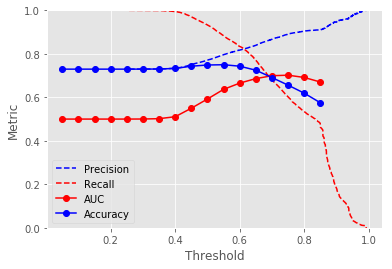

In [317]:
# Run final model, with optimized hyperparameters.
thresh = 0.73
rfc_best2 = RFC(n_estimators = 163,max_depth = 22,min_samples_leaf=3,min_samples_split=9,max_features=16)
rfc_best2.fit(Xtr2,ytr2) 

get_metrics(rfc_best2,Xtr2,Xte2,ytr2,yte2,thresh=0.73)
y_pred = rfc_best2.predict_proba(Xte2)[:,1]
do_auc_prec_recall(yte2,y_pred,show_confusion=0)

rfc_tmp = RFC(n_estimators = 163,max_depth = 22,min_samples_leaf=3,min_samples_split=9,max_features=16)
tmp_score = cv_score_prob(rfc_tmp, Xtr2,ytr2,thresh=0.73, score_func=roc_auc_score)
print(tmp_score)    

Feature ranking:
1. feature 126: age (0.352915)
2. feature 0: gender_1 (0.132394)
3. feature 128: action (0.067985)
4. feature 40: signup_method_1 (0.061338)
5. feature 41: signup_method_2 (0.060057)
6. feature 2: gender_3 (0.053979)
7. feature 1: gender_2 (0.038183)
8. feature 127: signup_flow (0.032856)
9. feature 57: first_browser_5 (0.015301)
10. feature 31: first_affiliate_tracked_1 (0.013746)


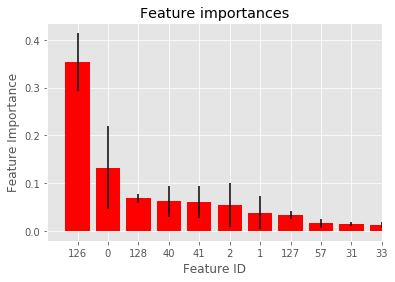

In [318]:
importances = rfc_best2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_best2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(0,10):  # range(Xtr2.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f],X_cleaned2.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Xtr2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1,10])
plt.xlabel('Feature ID')
plt.ylabel('Feature Importance')
plt.show()

In [354]:
# Compute ROC curve and ROC area 
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr_tr = dict()
tpr_tr = dict()
roc_auc_tr = dict()
n_classes = 2
y_pred = rfc_best2.predict_proba(Xte2)[:,1]
y_pred_tr = rfc_best2.predict_proba(Xtr2)[:,1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yte2[:], y_pred[:])
    roc_auc[i] = auc(fpr[i], tpr[i])
    fpr_tr[i], tpr_tr[i], _ = roc_curve(ytr2[:], y_pred_tr[:])
    roc_auc_tr[i] = auc(fpr_tr[i], tpr_tr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yte2.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
fpr_tr["micro"], tpr_tr["micro"], _ = roc_curve(ytr2.ravel(), y_pred_tr.ravel())
roc_auc_tr["micro"] = auc(fpr_tr["micro"], tpr_tr["micro"])

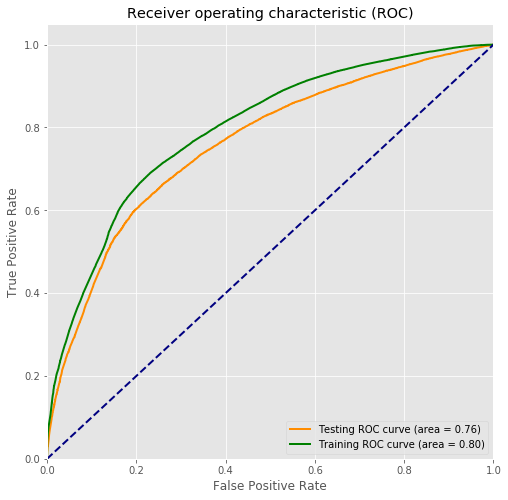

In [359]:
fig = plt.figure(figsize=(8, 8))
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=2, label='Testing ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr_tr[0], tpr_tr[0], color='green',
         lw=2, label='Training ROC curve (area = %0.2f)' % roc_auc_tr[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [377]:
# Average age of users who never made a booking
Xedit2[yedit2.slow_bookers==1].age.mean()

37.05372167126132

In [379]:
# Average age of users who made a slow booking
Xedit2[yedit2.slow_bookers==0].age.mean()

35.8763903068078

In [383]:
# Average age of users who made a fast booking
Xedit[yedit.slow_bookers==0].age.mean()

36.48553794829024

Text(0, 0.5, 'Normalized Frequency')

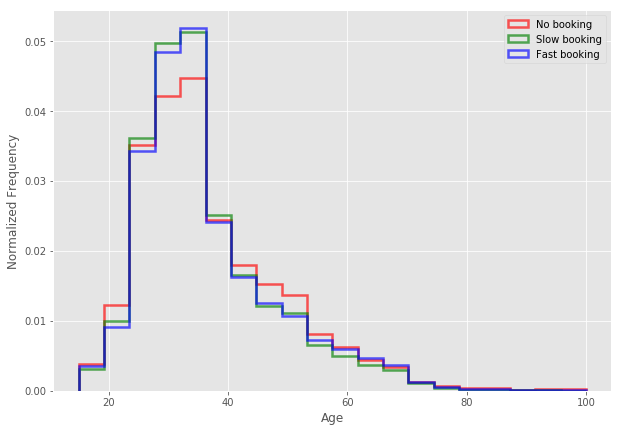

In [415]:
# Histogram of age for 3 classes
fig = plt.figure(figsize=(10, 7))
no_age = Xedit2[yedit2.slow_bookers==1].age
slow_age = Xedit2[yedit2.slow_bookers==0].age
fast_age = Xedit[yedit.slow_bookers==0].age
no_age_h = plt.hist(no_age,color='r',density=True,bins=20,histtype='step',linewidth=2.5,alpha=0.65)
plt.hist(slow_age,color='g',density=True,bins=20,histtype='step',linewidth=2.5,alpha=0.65)
plt.hist(fast_age,color='b',density=True,bins=20,histtype='step',linewidth=2.5,alpha=0.65)
plt.legend(['No booking','Slow booking','Fast booking'])
plt.xlabel('Age')
plt.ylabel('Normalized Frequency')

<div class="span5 alert alert-success">
<p> 
   The final random forest model has a training ROC AUC of 0.80 and a testing ROC AUC of 0.76. From the feature importances, above, we see that age and gender are the biggest predictors, followed by "action" and "signup_method." Generally, as seen in the averages above, people who made fast bookings tended to be older than people who made slow bookings (36.5 vs. 35.9 years). And people who never made a booking tended to be older still, at 37.1 years.
    
Overall, this model can be used to predict which users will likely make a booking in the future, separating them from the users which will never make a booking. 
   
   </p>
</div>